In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#list of list of data pints training data set
#0=blue,1=red
data=[[3,   1.5,  1],
      [2,   1,    0],
      [4,   1.5,  1],
      [3,   1,    0],
      [3.5, .5,   1],
      [2,   .5,   0],
      [5.5, 1,    1],
      [1,   1,    0]]

mistery_flower=[2,  1]

In [4]:
#network
#   o  flower type
#  / \   weights w1,w2, bias
# o   o  length,width
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.rand()


w1


In [5]:
# activation function sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))
#dfferentiation of sigmoid function
def sigmoid_der(x):
    return sigmoid(x) * (1-sigmoid(x))

In [6]:
T=np.linspace(-5,5,10)


In [7]:
Y=sigmoid(T)


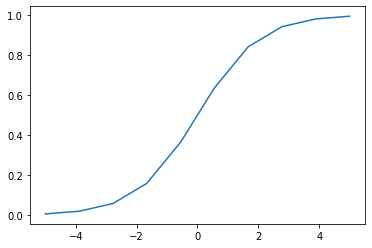

In [8]:
plt.plot(T,Y)

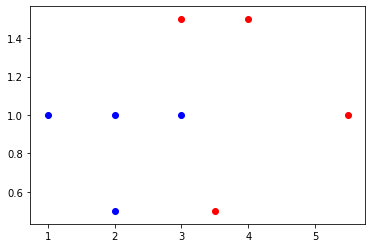

In [9]:
#scatter data
for i in range(len(data)):
    point=data[i]
    color="r"
    if(point[2]==0):
        color="b"
    plt.scatter(point[0],point[1],c=color)

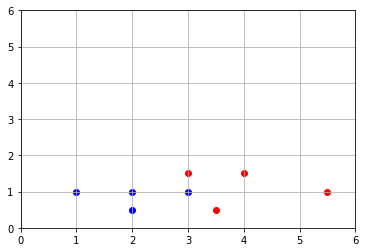

In [10]:
#scatter data in perticular scale
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point=data[i]
    color="r"
    if(point[2]==0):
        color="b"
    plt.scatter(point[0],point[1],c=color)

In [12]:
#training loop
learning_rate = 0.02
for i in range(50000):
    ri = np.random.randint(len(data))
    point=data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)

    target = point[2]
    #squared error function
    cost = np.square(pred - target)
    
    if i % 100 == 0:
    
        #differentiation of cost with respect to predection
        dcost_pred = 2 * (pred - target)

        #differentiation of pred with respect to dz ie differentiation of sigmoid
        dpred_dz= sigmoid_der(z)


        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db=1

        #differentioation of cost with respect to w1
        dcost_dw1 = dcost_pred * dpred_dz * dz_dw1

        #differentioation of cost with respect to w12
        dcost_dw2 = dcost_pred * dpred_dz * dz_dw2

        #differentioation of cost with respect to b
        dcost_db = dcost_pred * dpred_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db



In [15]:
# prediction for mistery flower
z = mistery_flower[0] * w1 + mistery_flower[1] * w2 + b
pred= sigmoid(z)
if(pred<=0.5):
    print("blue flower")
else:
    print("red flower")

blue flower


In [16]:
#prediction for another random flower
z = 2 * w1 + 1 * w2 + b
pred= sigmoid(z)
if(pred<=0.5):
    print("blue flower")
else:
    print("red flower")

blue flower


In [18]:
#prediction for another random flower
z = 5 * w1 + 1.4 * w2 + b
pred= sigmoid(z)
if(pred<=0.5):
    print("blue flower")
else:
    print("red flower")

red flower
